# Simulation und Modellierung WS17/18 - Uebung 06

### Aufgabe 1: Erzeugung und Multiplikation von Vektoren und Matrizen

Die Ableitung einer Funktion $f(x)$ an einer Stelle $x_0$ kann mit Hilfe eines geeigneten Differenzenquotienten approximiert werden. Es gilt

$$
    \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h} = f'(x_0)
$$

- Definieren Sie eine `N`x`N` Matrix `D`, welche auf einen `N`x`1` Vektor `f` angewendet die symmetrische Differenz der Gitterpunkte $(Df)_i = f_{i+1}-f_{i-1}$ berechnet, wobei man periodische Randbedingungen $f_{i+N}=f_i$ annimmt. 
- berechnen Sie mit Hilfe dieser Matrix die erste und zweite Abbleitung der Funktion `f(x) = sin(x)` welche an `N` Gitterpunkten auf dem Intervall $[0,2\pi)$ gegeben sei.
- plotten Sie $f(x)$, $f'(x)$ und $f''(x)$ in ein Diagramm.

In [1]:
#Ausgabe der Plots im Notebook und laden von numpy und pylab (matplotlib+pyplot)
%matplotlib inline
import numpy as np 
from pylab import *

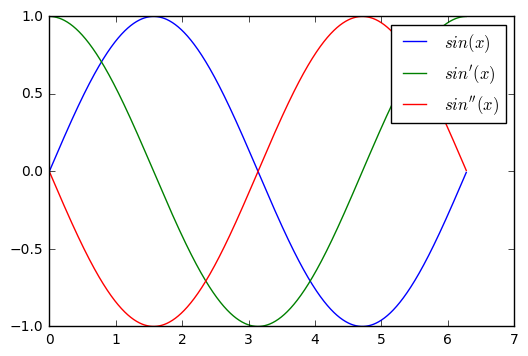

In [2]:
#define N, D, x, h, f, df  and d2f here
N=1000 #definiere N als Anzahl der Gitterpunkte
D=np.eye(N,k=1)-np.eye(N,k=-1)-np.eye(N,k=N-1)+np.eye(N,k=-N+1) #Definiere eine NxN Matrix D, die auf einen Spaltenvektor 
                                                                #angewendet, die symmetrische Differenz der Giterpunkte 
                                                                #berechnet. Die Werte der ersten Nebendiagonalen müssen 1 bzw.
                                                                #-1 sein. Für die periodischen Randbedingungen muss der letzte
                                                                #Wert der 0ten Zeile -1 sein und der letzte Wert der 0ten 
                                                                #Spalte +1.
x=np.linspace(0,2*pi,num=N,endpoint=False) #Definiere N gleichmäßig verteilte Gitterpunkte auf dem Intervall [0,2Pi)
h=x[1]-x[0] #h aus dem Differenzenquotienten entspricht dem Abstand von 2 benachbarten Gitterpunkten
f=np.sin(x) #Vektorisiere die Funktion sin x auf dem Intervall [0,2Pi)
df=np.dot(D,f)/(2*h) #Berechne den Differenzenquotienten für die erste Ableitung
d2f=np.dot(D,df)/(2*h) #Berechne erneut den Differenzenquotienten für die zweite Ableitung

plot(x,f,'b',label='$sin(x)$')
plot(x,df,'g',label='$sin\'(x)$')
plot(x,d2f,'r',label="$sin''(x)$")
legend()
show()

### Aufgabe 2 : Der getriebene, gedaempfte harm. Oszillator

Der getriebene, gedaempfte harmonische Oszillator genuegt der Differentialgleichung

$$
    \ddot x + 2\gamma \dot x + \omega_0^2 x = A \cos(t)
$$
z.B. mit $\gamma=0.1$, $\omega_0=1.0$ und $A=1.0$.
- Schreiben Sie eine Funktion `limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100)`, welche die lineare, inhomogene Differentialgleichung in `N` Zeitschritte ueber eine Periode der antreibenen Kraft diskretisiert und als lineares Gleichungssystem 
<br><br>
$$
    \frac{1}{4h^2}\textrm{D}^2\cdot \vec{x} + 2\gamma \frac{1}{2h}\textrm{D}\cdot \vec{x} + \omega_0^2 ~\mathbf{1}\cdot \vec{x} = A cos(\vec{t})
$$
loest. 

- Bestimmen und zeichnen Sie die Amplitude $B$ und die Phasenverschiebung $\varphi$ der Loesung $x = B \cos(t-\varphi)$ als Funktion von $\omega_0$. Hierfuer kann man die numpy Array Methode `x.argmax()` verwenden, welche den Index des maximalen Elements von `x` liefert.
- Zeichnen Sie die analytischen Loesungen
$$
\begin{eqnarray}
    B &=& \frac{A}{\sqrt{(\omega_0^2-1)^2+4\gamma^2}} \\
    \tan\varphi &=& \frac{-2\gamma}{\omega_0^2-1}
\end{eqnarray}
$$
ueber die von Ihnen numerisch gefundenen Loesungen als Funktion der Eigenfrequenz $\omega_0$ des harmonischen Oscillators. *Hinweis :* Die Methode `numpy.arctan2(y,x)` gibt den Winkel `alpha` mit `sin(alpha)=y` und `cos(alpha)=x` zurueck.

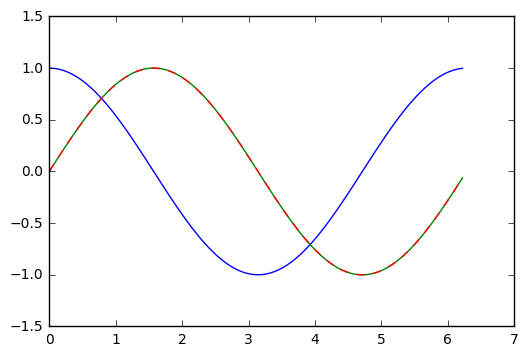

In [3]:
import numpy as np
def limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100) :
    """ 
    Bestimmt die Loesung der inhomogenen linearen Differentialgleichung
    d^2x/dt^2 + 2 gamma dx/dt + omega0^2 x = A cos(t)
    auf dem in N Punkte diskretisierten periodischen Zeitintervall [0,2pi)
    """
    
    #your code goes here
    t=np.linspace(0,2*pi,num=N,endpoint=False) #diskretisiere die Zeitachse in N Zeitschritte im Intervall [0,2Pi)
    dt=2*pi/N #definiere dt als die Größe eines Zeitschritts (Schrittweite)
    b=A*np.cos(t) #nenne die rechte Seite der inhom. DGL b
    D=np.eye(N,k=1)-np.eye(N,k=-1)-np.eye(N,k=N-1)+np.eye(N,k=-N+1) #Differentialoperator für die erste Ableitung (aus Aufg.1)
    D2=np.eye(N,k=+1)-2*np.eye(N)+np.eye(N,k=-1)+np.eye(N,k=N-1)+np.eye(N,k=-N+1) #Differentialoperator für die 2. Ableitung
    L=D2/(dt**2)+2*gamma*D/(2*dt)+omega0**2*np.eye(N) #fasse die Differentialoperatoren und Vorfaktoren zu einer Matrix L
                                                      #zusammen (die 4 vor dem h**2 in der Formel oben stimmt meiner Meinung
                                                      #nach nicht)
    x=np.linalg.solve(L,b) #Löse das enstandene Gleichungssystem und nenne die Lösung x
    xth=A*np.cos(t-pi/2)/np.sqrt((omega0**2-1)**2+4*gamma**2) #Darstellung der analytischen Lösung
    plot(t,b) #grafische Darstellung der treibenden Kraft,
    plot(t,x) # der numerischen Lösung
    plot(t,xth,'--') # und der analytischen Lösung 
    return(x) #Die Lösung x wird von der Funktion zurückgegeben

N=100
x=limit_cycle(gamma=0.5,N=N) #Beispielaufruf der Funktion


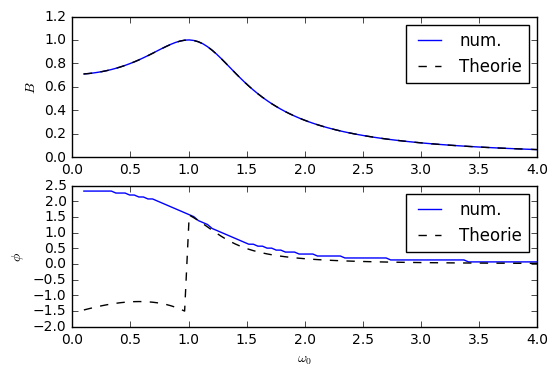

In [8]:
L=100
omega0 = np.linspace(0.1,4,L)
B = np.zeros(L)
phi = np.zeros(L)

# bestimme B und phi numerisch fuer alle Werte in omega0
# definiere die theoretischen Werte Bth und phith
N=100
gamma=0.5
A=1.0
for i in range(L):                                       #for-Schleife zur Erstellung von B und phi. i geht die Inices von 
    x=limit_cycle(omega0=omega0[i],gamma=gamma,A=A,N=N)  #omega0 durch. Bei jedem Schleifendurchgang wird die Funktion 
    imax=x.argmax()                                      #limit_cycle aufgerufen und x für ein neues omega0 berechnet.
    B[i]=x[imax]                                         #Die Amplitude entspricht dem maximalen Wert im Intervall.
    phi[i]=imax*2*pi/N                                   #Die Phasenverschiebung entspricht der Zeit, an der die Fkt. maximal
                                                         #wird.
Bth=A/np.sqrt((omega0**2-1)**2+4*gamma**2) #analytische Berechnung der Amplitude B nach obiger Formel
tanphi=2*gamma/(omega0**2-1)              #Berechnung von tan phi nach obiger Formel
phith=np.arctan2(tanphi,omega0)            #Berechnung von phi als Funktion von omega0
###### phith = np.arctan2(2.*gamma,(omega0**2-1)) # probiere mal hier, Winkel = np.arctan2(Sin(Winkel), Cos(Winkel))

subplot(2,1,1)
plot(omega0,B,label='num.')
plot(omega0,Bth,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$B$')


subplot(2,1,2)
plot(omega0,phi,label='num.')
plot(omega0,phith,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$\phi$')
show()

-5